# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constant

In [2]:
DATASET_TEMP = "/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv"
DATASET_TEMP_STATE = "/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv"
DATASET_TEMP_COUNTRY = "/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv"
DATASET_TEMP_CITY = "/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv"
DATASET_TEMP_MJR_CITY = "/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv"

# Code

In [3]:
df_temp_global_city = pd.read_csv(DATASET_TEMP_CITY)
df_temp_global_city['dt'] = pd.to_datetime(df_temp_global_city['dt'])
df_temp_global_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [4]:
df_temp_global_city.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [5]:
df_karachi = df_temp_global_city[(df_temp_global_city['Country'] == 'Pakistan') & (df_temp_global_city['City'] == 'Karachi')]
df_karachi.head(4)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3642996,1796-01-01,17.996,2.362,Karachi,Pakistan,24.92N,67.39E
3642997,1796-02-01,20.203,1.899,Karachi,Pakistan,24.92N,67.39E
3642998,1796-03-01,23.303,2.464,Karachi,Pakistan,24.92N,67.39E
3642999,1796-04-01,28.124,1.912,Karachi,Pakistan,24.92N,67.39E


### 1. Check central tendency

In [6]:
mean_temp = df_karachi['AverageTemperature'].mean()
median_temp = df_karachi['AverageTemperature'].median()
mode_temp = df_karachi['AverageTemperature'].mode()[0]  # Mode can have multiple values, take the first

print(f"Mean Average Temperature: {mean_temp}")
print(f"Median Average Temperature: {median_temp}")
print(f"Mode Average Temperature: {mode_temp}")

Mean Average Temperature: 26.01725903614458
Median Average Temperature: 27.588
Mode Average Temperature: 19.126


In [7]:
df_karachi.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty
count,2613,2324.000000,2324.000000
mean,1904-10-31 13:13:34.236509696,26.017259,0.921346
min,1796-01-01 00:00:00,14.607000,0.097000
25%,1850-06-01 00:00:00,21.970500,0.377000
50%,1904-11-01 00:00:00,27.588000,0.596500
75%,1959-04-01 00:00:00,30.038000,1.429000
max,2013-09-01 00:00:00,33.231000,4.886000
std,NaN,4.790453,0.734068


### 2. Perform Outlier Analysis

In [8]:
# Calculate IQR for AverageTemperature
Q1 = df_karachi['AverageTemperature'].quantile(0.25)
Q3 = df_karachi['AverageTemperature'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_karachi[(df_karachi['AverageTemperature'] < lower_bound) | (df_karachi['AverageTemperature'] > upper_bound)]
outliers

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude


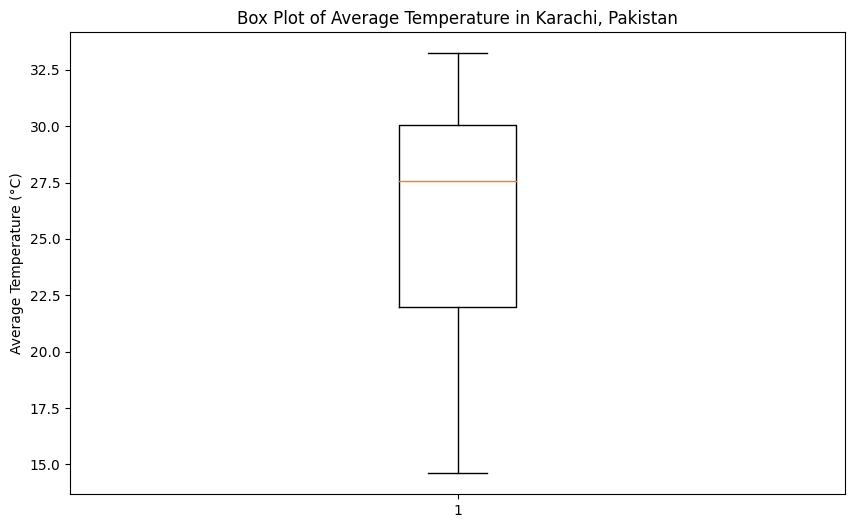

In [9]:
# Plot the box plot for 'AverageTemperature'
plt.figure(figsize=(10, 6))
plt.boxplot(df_karachi['AverageTemperature'].dropna())  # Drop NaN values if any
plt.title('Box Plot of Average Temperature in Karachi, Pakistan')
plt.ylabel('Average Temperature (°C)')
plt.show()

### 3. Scatter Plot

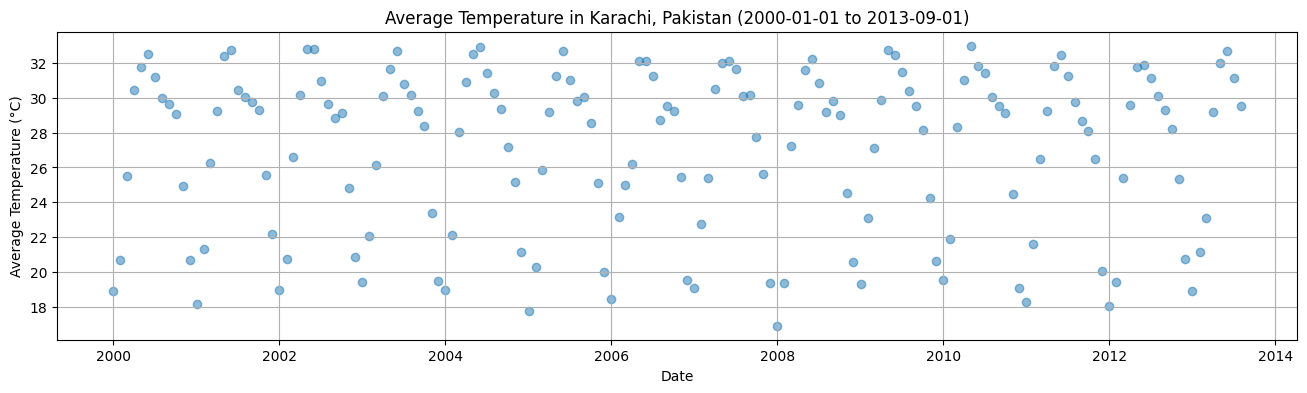

In [10]:
# Filter the DataFrame for the specified date range
start_date = '2000-01-01'
end_date = '2013-09-01'
df_date_filtered = df_karachi[(df_karachi['dt'] >= start_date) & (df_karachi['dt'] <= end_date)]

# Plot the scatter plot
plt.figure(figsize=(16, 4))
plt.scatter(df_date_filtered['dt'], df_date_filtered['AverageTemperature'], alpha=0.5)
plt.title('Average Temperature in Karachi, Pakistan (2000-01-01 to 2013-09-01)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()